In [1]:
import copy

import numpy as np
import pandas as pd
import rasterio
from rasterio.windows import from_bounds
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from skopt import BayesSearchCV
from skopt.space import Categorical, Integer
from tqdm import tqdm
from matplotlib import pyplot as plt

In [2]:
import pandas as pd
        
BH_tif_400_400_after_processing = pd.read_csv('../useful_data_after_processing/BH_tif_400_400_after_processing.csv', sep = ',', header = None)
BV_tif_400_400_after_processing = pd.read_csv('../useful_data_after_processing/BV_tif_400_400_after_processing.csv', sep = ',', header = None)
CNM_tif_400_400_after_processing = pd.read_csv('../useful_data_after_processing/CNM_tif_400_400_after_processing.csv', sep = ',', header = None)
LAI_tif_400_400_after_processing = pd.read_csv('../useful_data_after_processing/LAI_tif_400_400_after_processing.csv', sep = ',', header = None)
DSM_tif_400_400_after_processing = pd.read_csv('../useful_data_after_processing/DSM_tif_400_400_after_processing.csv', sep = ',', header = None)
Air_Temperature_C_400_400_after_processing = pd.read_csv('../useful_data_after_processing/Air_Temperature_C_400_400_after_processing.csv', sep = ',', header = None)
Dew_Point_C_400_400_after_processing = pd.read_csv('../useful_data_after_processing/Dew_Point_C_400_400_after_processing.csv', sep = ',', header = None)
Relative_Humidity_400_400_after_processing = pd.read_csv('../useful_data_after_processing/Relative_Humidity_400_400_after_processing.csv', sep = ',', header = None)
Wind_Speed_400_400_after_processing = pd.read_csv('../useful_data_after_processing/Wind_Speed_400_400_after_processing.csv', sep = ',', header = None)


In [3]:
import numpy as np
from scipy import stats

def analyze_layers(inpute, name=None):
    print(f"分析 {name if name else '输入'} 层：")

    # 总体最值
    min_value = np.min(inpute)
    max_value = np.max(inpute)
    
    # 形状
    print(f"形状: {inpute.shape}")

    # 展平
    layer = inpute.values.flatten()
    unique, counts = np.unique(layer, return_counts=True)

    # 统计只出现1次的数值
    once_values = unique[counts == 1]
    num_once = len(once_values)

    # 计算均值、方差和中位数，最值
    mean_once = np.mean(once_values) if num_once > 0 else None
    var_once = np.var(once_values) if num_once > 0 else None
    median_once = np.median(once_values) if num_once > 0 else None
    min_once = np.min(once_values) if num_once > 0 else None
    max_once = np.max(once_values) if num_once > 0 else None

    # 统计只出现2次的数值
    twice_values = unique[counts == 2]
    num_twice = len(twice_values)

    # 计算均值、方差和中位数
    mean_twice = np.mean(twice_values) if num_twice > 0 else None
    var_twice = np.var(twice_values) if num_twice > 0 else None
    median_twice = np.median(twice_values) if num_twice > 0 else None
    min_twice = np.min(twice_values) if num_twice > 0 else None
    max_twice = np.max(twice_values) if num_twice > 0 else None

    # 统计只出现3次的数值
    thrice_values = unique[counts == 3]
    num_thrice = len(thrice_values)

    # 计算均值、方差和中位数
    mean_thrice = np.mean(thrice_values) if num_thrice > 0 else None
    var_thrice = np.var(thrice_values) if num_thrice > 0 else None
    median_thrice = np.median(thrice_values) if num_thrice > 0 else None
    min_thrice = np.min(thrice_values) if num_thrice > 0 else None
    max_thrice = np.max(thrice_values) if num_thrice > 0 else None

    # 统计不止出现3次的数值及其对应出现次数
    more_than_once = dict(zip(unique[counts > 3], counts[counts > 3]))

    # 打印输出结果
    print(f"总体最小值: {min_value}, 总体最大值: {max_value}")
    print(f"只出现1次的数值共有 {num_once} 个，它们出现了 {np.sum(counts[counts == 1])} 次。它们的均值、方差、中位数、最小值、最大值分别是 {mean_once}, {var_once}, {median_once}, {min_once}, {max_once}")
    print(f"只出现2次的数值共有 {num_twice} 个，它们出现了 {np.sum(counts[counts == 2])} 次。它们的均值、方差、中位数、最小值、最大值分别是 {mean_twice}, {var_twice}, {median_twice}, {min_twice}, {max_twice}")
    print(f"只出现3次的数值共有 {num_thrice} 个，它们出现了 {np.sum(counts[counts == 3])} 次。它们的均值、方差、中位数、最小值、最大值分别是 {mean_thrice}, {var_thrice}, {median_thrice}, {min_thrice}, {max_thrice}")
    if more_than_once:
        print("不止出现3次的数值及其对应出现次数进行逆序排列如下：")
        for value, count in sorted(more_than_once.items(), key=lambda x: x[1], reverse=True):
            print(f"{value:>10}  : {value.dtype} : {count}")
    else:
        print("没有不止出现1次的数值。")
    print()


In [4]:
# analyze_layers(BH_tif_400_400_after_processing, '建筑物高度')


In [5]:
# analyze_layers(BV_tif_400_400_after_processing, '建筑物体积')

In [6]:
# analyze_layers(CNM_tif_400_400_after_processing, '树冠高度')

In [7]:
# analyze_layers(LAI_tif_400_400_after_processing, '叶面积指数')

In [8]:
# analyze_layers(DSM_tif_400_400_after_processing, '地形数据')

In [9]:
# analyze_layers(Air_Temperature_C_400_400_after_processing, '空气温度')

In [10]:
# analyze_layers(Dew_Point_C_400_400_after_processing, '露点温度')

In [11]:
# analyze_layers(Relative_Humidity_400_400_after_processing, '相对湿度')

In [12]:
# analyze_layers(Wind_Speed_400_400_after_processing, '风速')

## 数据检查

In [13]:
X = np.stack([BH_tif_400_400_after_processing, BV_tif_400_400_after_processing, CNM_tif_400_400_after_processing, LAI_tif_400_400_after_processing, DSM_tif_400_400_after_processing], axis=-1)
Y = np.stack([Air_Temperature_C_400_400_after_processing, Dew_Point_C_400_400_after_processing, Relative_Humidity_400_400_after_processing, Wind_Speed_400_400_after_processing], axis=-1)

In [14]:
X_labels = ['BH', 'BV', 'CNM', 'LAI', 'DSM']
Y_labels = ['AT', 'DP', 'RH', 'WS']

In [15]:
X.shape

(400, 400, 5)

In [16]:
Y.shape

(400, 400, 4)

In [17]:
# 展平X和Y
X_flatten = X.reshape(-1, 5)  # X 变成形状 (160000, 5)
Y_flatten = Y.reshape(-1, 4)  # Y 变成形状 (160000, 4)

In [18]:
X_flatten.shape

(160000, 5)

In [19]:
Y_flatten.shape

(160000, 4)

In [20]:
X_reshaped = X_flatten
Y_reshaped = Y_flatten

In [21]:
X_reshaped.shape

(160000, 5)

In [22]:
Y_reshaped.shape

(160000, 4)

In [23]:
X_contains_nan_or_inf = np.isnan(X_reshaped).any() or np.isinf(X_reshaped).any()
Y_contains_nan_or_inf = np.isnan(Y_reshaped).any() or np.isinf(Y_reshaped).any()

print("X contains NaN or Infinity:", X_contains_nan_or_inf)
print("Y contains NaN or Infinity:", Y_contains_nan_or_inf)

X contains NaN or Infinity: False
Y contains NaN or Infinity: False


In [24]:
print("X min:", X_reshaped.min(), "X max:", X_reshaped.max())
print("Y min:", Y_reshaped.min(), "Y max:", Y_reshaped.max())


X min: -5.016123294830321 X max: 1470306.4419853743
Y min: 0.3906410594318859 Y max: 69.43959655478638


In [25]:
# 深复制X
X_400_400 = X.copy()
Y_400_400 = Y.copy()

In [26]:
# 读取数据
X = X_reshaped
Y = Y_reshaped
X.shape, Y.shape

((160000, 5), (160000, 4))

In [27]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import time
from datetime import datetime

In [28]:
# 定义进度条回调函数
class TqdmProgressCallback:
    def __init__(self, total_iterations, model_idx):
        self.pbar = tqdm(total=total_iterations, desc=f"Optimizing Model {model_idx+1}")

    def __call__(self, result):
        self.pbar.update(1)

    def close(self):
        self.pbar.close()

In [29]:
# 定义随机森林的超参数搜索空间
search_space = {
    'n_estimators': Integer(100, 300),  # 决策树数量
    'max_depth': Integer(10, 30),  # 最大深度
    'max_features': Categorical(['sqrt', 'log2', None]), # 最大特征数，None表示使用所有特征
    'min_samples_split': Integer(2, 10),  # 最小分裂样本数
    'min_samples_leaf': Integer(1, 4),  # 最小叶子节点样本数
    # 'bootstrap': Categorical([True])  # 由于袋外估计必须使用自助采样法，因此固定其值
}


In [30]:
# 对每一层Y都进行超参数优化，并记录相应数据

best_params_list = []
best_metrics_list = []
importance_matrices = np.zeros((X_reshaped.shape[1], Y_reshaped.shape[1]))

n_iter = 10  # 迭代次数

In [31]:
scoring = {
    'mse': 'neg_mean_squared_error',  # Mean Squared Error 均方误差
    'r2': 'r2',  # R² Coefficient of Determination 决定系数
    'mae': 'neg_mean_absolute_error',  # Mean Absolute Error 平均绝对误差
}

In [32]:
def get_best_metrics(bayes_search, best_params):
    """获取最佳参数对应的评价指标"""
    best_iteration = None
    for idx, params in enumerate(bayes_search.cv_results_['params']):
        if params == best_params:
            best_iteration = idx
            break
    if best_iteration is not None:
        return {
            'mse': -bayes_search.cv_results_['mean_test_mse'][best_iteration],
            'r2': bayes_search.cv_results_['mean_test_r2'][best_iteration],
            'mae': -bayes_search.cv_results_['mean_test_mae'][best_iteration],
        }
    return None

In [33]:
def TrainRandomForestModel(X, Y, bayes_search, index):
    print(f"Optimizing model for Y[:, {index}]")

    # 定义进度条
    progress_callback = TqdmProgressCallback(total_iterations=n_iter, model_idx=index)

    # 存储每次迭代的参数和指标
    iter_params = []
    iter_metrics = []

    # 执行贝叶斯优化
    print(f"----------Start optimizing model for Y[:, {index}]----------")
    bayes_search.fit(X, Y[:, index], callback=[progress_callback])
    print(f"----------Finish optimizing model for Y[:, {index}]----------")

    # 获取每次迭代的参数和指标
    for idx, params in enumerate(bayes_search.cv_results_['params']):
        metrics = {
            'mse': -bayes_search.cv_results_['mean_test_mse'][idx],
            'r2': bayes_search.cv_results_['mean_test_r2'][idx],
            'mae': -bayes_search.cv_results_['mean_test_mae'][idx],
        }
        iter_params.append(params)
        iter_metrics.append(metrics)

    # 获取最佳参数
    best_params = bayes_search.best_params_
    best_params_list.append(best_params)

    # 计算最佳参数对应的评价指标
    best_metrics = get_best_metrics(bayes_search, best_params)
    if best_metrics:
        best_metrics_list.append(best_metrics)

    importance_matrices[:, index] = bayes_search.best_estimator_.feature_importances_
    progress_callback.close()
    
    return iter_params, iter_metrics

In [34]:
model_DP = RandomForestRegressor(random_state=42, oob_score=True)
model_AT = RandomForestRegressor(random_state=42, oob_score=True)
model_RH = RandomForestRegressor(random_state=42, oob_score=True)
model_WS = RandomForestRegressor(random_state=42, oob_score=True)

In [35]:
# 使用贝叶斯优化进行超参数搜索
def bayes_search_model(model,search_space,n_iter,scoring):
    bayes_search = BayesSearchCV(
        estimator=model,
        search_spaces=search_space,
        n_iter=n_iter,  # 迭代次数
        cv=5,  # 5 折交叉验证
        n_jobs=-1,  # 使用所有可用的核
        verbose=0,  # 显示详细信息
        scoring=scoring, # 评分标准
        refit='r2' # 使用r2作为评分, 这样scoring里的值都会被计算和储存，但是只使用mse作为优化标准
    )
    return bayes_search

In [36]:
bayes_search_DP = bayes_search_model(model_DP,search_space,n_iter,scoring)
bayes_search_AT = bayes_search_model(model_AT,search_space,n_iter,scoring)
bayes_search_RH = bayes_search_model(model_RH,search_space,n_iter,scoring)
bayes_search_WS = bayes_search_model(model_WS,search_space,n_iter,scoring)

In [37]:
# 创建存储迭代数据的列表
all_iter_params = []
all_iter_metrics = []

In [38]:
iter_params_DP, iter_metrics_DP = TrainRandomForestModel(X, Y, bayes_search_DP, 0)
all_iter_params.append(iter_params_DP)
all_iter_metrics.append(iter_metrics_DP)

Optimizing model for Y[:, 0]


Optimizing Model 1:   0%|          | 0/10 [00:00<?, ?it/s]

----------Start optimizing model for Y[:, 0]----------


Optimizing Model 1: 100%|██████████| 10/10 [11:18<00:00, 67.80s/it]

----------Finish optimizing model for Y[:, 0]----------


In [39]:
iter_params_AT, iter_metrics_AT = TrainRandomForestModel(X, Y, bayes_search_AT, 1)
all_iter_params.append(iter_params_AT)
all_iter_metrics.append(iter_metrics_AT)

Optimizing model for Y[:, 1]


Optimizing Model 2:   0%|          | 0/10 [00:00<?, ?it/s]

----------Start optimizing model for Y[:, 1]----------


Optimizing Model 2: 100%|██████████| 10/10 [13:58<00:00, 83.81s/it]

----------Finish optimizing model for Y[:, 1]----------


In [40]:

iter_params_RH, iter_metrics_RH = TrainRandomForestModel(X, Y, bayes_search_RH, 2)
all_iter_params.append(iter_params_RH)
all_iter_metrics.append(iter_metrics_RH)

Optimizing model for Y[:, 2]


Optimizing Model 3:   0%|          | 0/10 [00:00<?, ?it/s]

----------Start optimizing model for Y[:, 2]----------


Optimizing Model 3: 100%|██████████| 10/10 [13:18<00:00, 79.82s/it]

----------Finish optimizing model for Y[:, 2]----------


In [68]:
all_iter_params

[[OrderedDict([('max_depth', 12),
               ('max_features', 'log2'),
               ('min_samples_leaf', 1),
               ('min_samples_split', 5),
               ('n_estimators', 147)]),
  OrderedDict([('max_depth', 22),
               ('max_features', 'sqrt'),
               ('min_samples_leaf', 4),
               ('min_samples_split', 2),
               ('n_estimators', 262)]),
  OrderedDict([('max_depth', 30),
               ('max_features', 'sqrt'),
               ('min_samples_leaf', 1),
               ('min_samples_split', 8),
               ('n_estimators', 233)]),
  OrderedDict([('max_depth', 25),
               ('max_features', 'sqrt'),
               ('min_samples_leaf', 2),
               ('min_samples_split', 10),
               ('n_estimators', 117)]),
  OrderedDict([('max_depth', 11),
               ('max_features', 'sqrt'),
               ('min_samples_leaf', 4),
               ('min_samples_split', 2),
               ('n_estimators', 131)]),
  OrderedDict([('ma

In [102]:
len(all_iter_params), len(all_iter_metrics)

(4, 4)

In [69]:
all_iter_metrics

[[{'mse': 0.004008898210457596,
   'r2': -0.2839473430406581,
   'mae': 0.051718006982054324},
  {'mse': 0.004408494721401458,
   'r2': -0.4148920093667822,
   'mae': 0.054001537777409035},
  {'mse': 0.004620274965704859,
   'r2': -0.4853868306643738,
   'mae': 0.054971017612671716},
  {'mse': 0.004508720510082294,
   'r2': -0.4478357212222376,
   'mae': 0.05448640580445929},
  {'mse': 0.003921430541386406,
   'r2': -0.25616382966986884,
   'mae': 0.05119755927117005},
  {'mse': 0.004550194496429111,
   'r2': -0.46204355654997864,
   'mae': 0.054623904371332174},
  {'mse': 0.004785280746747731,
   'r2': -0.5370488566896393,
   'mae': 0.055559376003227176},
  {'mse': 0.004596893536972612,
   'r2': -0.474597149836228,
   'mae': 0.05467146377999928},
  {'mse': 0.0047956953101623515,
   'r2': -0.540420227940756,
   'mae': 0.055588317518368235},
  {'mse': 0.004344388360814754,
   'r2': -0.39369997416060737,
   'mae': 0.05366200705643788}],
 [{'mse': 0.003335587764529696,
   'r2': -0.2231243

In [70]:
len(all_iter_params)

4

In [71]:
len(all_iter_metrics)

4

In [72]:
all_iter_params_copy = all_iter_params.copy()
all_iter_metrics_copy = all_iter_metrics.copy()

In [73]:
all_iter_params.pop()
all_iter_metrics.pop()
len(all_iter_params), len(all_iter_metrics)

(3, 3)

In [74]:
iter_params_WS, iter_metrics_WS = TrainRandomForestModel(X, Y, bayes_search_WS, 3)
all_iter_params.append(iter_params_WS)
all_iter_metrics.append(iter_metrics_WS)

Optimizing model for Y[:, 3]



Optimizing Model 4:   0%|          | 0/10 [00:00<?, ?it/s]

----------Start optimizing model for Y[:, 3]----------



Optimizing Model 4: 100%|██████████| 10/10 [14:56<00:00, 89.68s/it] 

----------Finish optimizing model for Y[:, 3]----------


In [99]:
all_iter_params

In [87]:
all_iter_metrics

[[{'mse': 0.004008898210457596,
   'r2': -0.2839473430406581,
   'mae': 0.051718006982054324},
  {'mse': 0.004408494721401458,
   'r2': -0.4148920093667822,
   'mae': 0.054001537777409035},
  {'mse': 0.004620274965704859,
   'r2': -0.4853868306643738,
   'mae': 0.054971017612671716},
  {'mse': 0.004508720510082294,
   'r2': -0.4478357212222376,
   'mae': 0.05448640580445929},
  {'mse': 0.003921430541386406,
   'r2': -0.25616382966986884,
   'mae': 0.05119755927117005},
  {'mse': 0.004550194496429111,
   'r2': -0.46204355654997864,
   'mae': 0.054623904371332174},
  {'mse': 0.004785280746747731,
   'r2': -0.5370488566896393,
   'mae': 0.055559376003227176},
  {'mse': 0.004596893536972612,
   'r2': -0.474597149836228,
   'mae': 0.05467146377999928},
  {'mse': 0.0047956953101623515,
   'r2': -0.540420227940756,
   'mae': 0.055588317518368235},
  {'mse': 0.004344388360814754,
   'r2': -0.39369997416060737,
   'mae': 0.05366200705643788}],
 [{'mse': 0.003335587764529696,
   'r2': -0.2231243

In [103]:
len(all_iter_params), len(all_iter_metrics)

(4, 4)

In [75]:
best_params_list

[OrderedDict([('max_depth', 11),
              ('max_features', 'sqrt'),
              ('min_samples_leaf', 4),
              ('min_samples_split', 2),
              ('n_estimators', 131)]),
 OrderedDict([('max_depth', 13),
              ('max_features', 'sqrt'),
              ('min_samples_leaf', 3),
              ('min_samples_split', 9),
              ('n_estimators', 279)]),
 OrderedDict([('max_depth', 12),
              ('max_features', 'log2'),
              ('min_samples_leaf', 1),
              ('min_samples_split', 7),
              ('n_estimators', 251)]),
 OrderedDict([('max_depth', 11),
              ('max_features', 'log2'),
              ('min_samples_leaf', 2),
              ('min_samples_split', 7),
              ('n_estimators', 230)]),
 OrderedDict([('max_depth', 15),
              ('max_features', 'sqrt'),
              ('min_samples_leaf', 1),
              ('min_samples_split', 8),
              ('n_estimators', 248)])]

In [76]:
best_metrics_list

[{'mse': 0.003921430541386406,
  'r2': -0.25616382966986884,
  'mae': 0.05119755927117005},
 {'mse': 0.0030409264589049793,
  'r2': -0.11579598922340577,
  'mae': 0.045645525557893654},
 {'mse': 0.22893500328113497,
  'r2': -0.15669802448912146,
  'mae': 0.39389026773931657},
 {'mse': 0.0001488652897985054,
  'r2': -0.09421519757350875,
  'mae': 0.010210008586303538},
 {'mse': 0.00015629508542923197,
  'r2': -0.15056248651066576,
  'mae': 0.010346579749262836}]

In [104]:
len(best_params_list), len(best_metrics_list)

(5, 5)

In [108]:
best_params_list_copy = best_params_list.copy()
best_metrics_list_copy = best_metrics_list.copy()

In [109]:
len(best_params_list_copy), len(best_metrics_list_copy)

(5, 5)

In [110]:
# del best_params_list[-2]
# del best_metrics_list[-2]

In [111]:
len(best_params_list), len(best_metrics_list)

(4, 4)

In [112]:
importance_matrices

array([[0.23066141, 0.16303485, 0.1969028 , 0.13916758],
       [0.00162193, 0.00097141, 0.00142324, 0.00140587],
       [0.14512184, 0.15453634, 0.15044975, 0.14116583],
       [0.14778761, 0.16263536, 0.1537232 , 0.1394818 ],
       [0.47480721, 0.51882205, 0.49750101, 0.57877893]])

In [113]:
len(best_params_list), len(best_metrics_list), importance_matrices.shape

(4, 4, (5, 4))

In [114]:
# 保存结果
import pickle

with open('../Results/RF_HP_all_iter_params_r2.pkl', 'wb') as f:
    pickle.dump(all_iter_params, f)
    
with open('../Results/RF_HP_all_iter_metrics_r2.pkl', 'wb') as f:
    pickle.dump(all_iter_metrics, f)

with open('../Results/RF_HP_best_params_list_r2.pkl', 'wb') as f:
    pickle.dump(best_params_list, f)

with open('../Results/RF_HP_best_metrics_list_r2.pkl', 'wb') as f:
    pickle.dump(best_metrics_list, f)

with open('../Results/RF_HP_importance_matrices_r2.pkl', 'wb') as f:
    pickle.dump(importance_matrices, f)

print("Results saved successfully!")

Results saved successfully!


In [118]:
# 打印每一层Y的最佳参数和评价指标
for i, (params, metrics) in enumerate(zip(best_params_list, best_metrics_list)):
    print(f'len(best_params_list): {len(best_params_list)}, len(best_metrics_list): {len(best_metrics_list)}')
    print(f"Best parameters for Y[:, {i}]: {params}")
    print(f"Metrics: MSE={metrics['mse']}, R²={metrics['r2']}, MAE={metrics['mae']}")

len(best_params_list): 4, len(best_metrics_list): 4
Best parameters for Y[:, 0]: OrderedDict([('max_depth', 11), ('max_features', 'sqrt'), ('min_samples_leaf', 4), ('min_samples_split', 2), ('n_estimators', 131)])
Metrics: MSE=0.003921430541386406, R²=-0.25616382966986884, MAE=0.05119755927117005
len(best_params_list): 4, len(best_metrics_list): 4
Best parameters for Y[:, 1]: OrderedDict([('max_depth', 13), ('max_features', 'sqrt'), ('min_samples_leaf', 3), ('min_samples_split', 9), ('n_estimators', 279)])
Metrics: MSE=0.0030409264589049793, R²=-0.11579598922340577, MAE=0.045645525557893654
len(best_params_list): 4, len(best_metrics_list): 4
Best parameters for Y[:, 2]: OrderedDict([('max_depth', 12), ('max_features', 'log2'), ('min_samples_leaf', 1), ('min_samples_split', 7), ('n_estimators', 251)])
Metrics: MSE=0.22893500328113497, R²=-0.15669802448912146, MAE=0.39389026773931657
len(best_params_list): 4, len(best_metrics_list): 4
Best parameters for Y[:, 3]: OrderedDict([('max_depth

In [116]:
best_params_list

[OrderedDict([('max_depth', 11),
              ('max_features', 'sqrt'),
              ('min_samples_leaf', 4),
              ('min_samples_split', 2),
              ('n_estimators', 131)]),
 OrderedDict([('max_depth', 13),
              ('max_features', 'sqrt'),
              ('min_samples_leaf', 3),
              ('min_samples_split', 9),
              ('n_estimators', 279)]),
 OrderedDict([('max_depth', 12),
              ('max_features', 'log2'),
              ('min_samples_leaf', 1),
              ('min_samples_split', 7),
              ('n_estimators', 251)]),
 OrderedDict([('max_depth', 15),
              ('max_features', 'sqrt'),
              ('min_samples_leaf', 1),
              ('min_samples_split', 8),
              ('n_estimators', 248)])]

In [117]:
best_metrics_list

[{'mse': 0.003921430541386406,
  'r2': -0.25616382966986884,
  'mae': 0.05119755927117005},
 {'mse': 0.0030409264589049793,
  'r2': -0.11579598922340577,
  'mae': 0.045645525557893654},
 {'mse': 0.22893500328113497,
  'r2': -0.15669802448912146,
  'mae': 0.39389026773931657},
 {'mse': 0.00015629508542923197,
  'r2': -0.15056248651066576,
  'mae': 0.010346579749262836}]

In [119]:
mse_scores = [metrics['mse'] for metrics in best_metrics_list]
r2_scores = [metrics['r2'] for metrics in best_metrics_list]
mae_scores = [metrics['mae'] for metrics in best_metrics_list]

In [120]:
X_labels

['BH', 'BV', 'CNM', 'LAI', 'DSM']

In [121]:
Y_labels

['AT', 'DP', 'RH', 'WS']

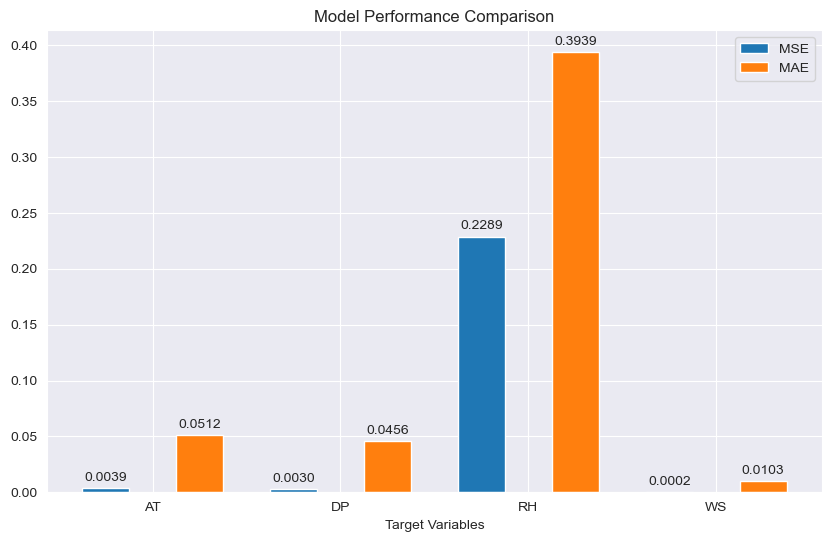

In [122]:
x = np.arange(len(Y_labels))  # 标签的位置
width = 0.25  # 柱状图的宽度

fig, ax = plt.subplots(figsize=(10, 6))

# 绘制柱状图
rects1 = ax.bar(x - width, mse_scores, width, label='MSE')
# rects2 = ax.bar(x, r2_scores, width, label='R²')
rects3 = ax.bar(x + width, mae_scores, width, label='MAE')

# 添加文本标签
ax.set_xlabel('Target Variables')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(Y_labels)
ax.legend()

# 显示数值
def autolabel(rects):
    """在每个条形图顶部显示数值"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
# autolabel(rects2)
autolabel(rects3)

plt.savefig('../Images_Output/Bar_Chart_Model_Performance_Comparison_without_r2.png')

plt.show()

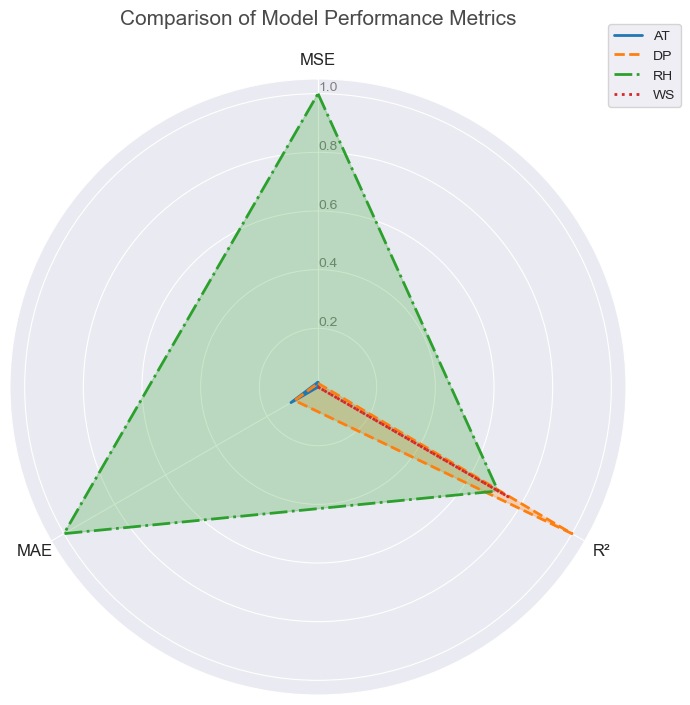

In [124]:
from math import pi
import matplotlib.pyplot as plt
import numpy as np

# 数据准备
categories = ['MSE', 'R²', 'MAE']
num_vars = len(categories)

# 数据标准化
mse_scores_normalized = (mse_scores - np.min(mse_scores)) / (np.max(mse_scores) - np.min(mse_scores))
r2_scores_normalized = (r2_scores - np.min(r2_scores)) / (np.max(r2_scores) - np.min(r2_scores))
mae_scores_normalized = (mae_scores - np.min(mae_scores)) / (np.max(mae_scores) - np.min(mae_scores))

data = [
    [mse_scores_normalized[0], r2_scores_normalized[0], mae_scores_normalized[0]],
    [mse_scores_normalized[1], r2_scores_normalized[1], mae_scores_normalized[1]],
    [mse_scores_normalized[2], r2_scores_normalized[2], mae_scores_normalized[2]],
    [mse_scores_normalized[3], r2_scores_normalized[3], mae_scores_normalized[3]],
]

# 角度和布局
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # 将第一个角度加到最后，用于闭合图形

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# 自定义颜色和线条样式
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
linestyles = ['solid', 'dashed', 'dashdot', 'dotted']

# 绘制每一个雷达图
for i in range(len(Y_labels)):
    values = data[i] + data[i][:1]  # 闭合图形
    ax.plot(angles, values, linewidth=2, linestyle=linestyles[i], color=colors[i], label=Y_labels[i])
    ax.fill(angles, values, color=colors[i], alpha=0.25)

# 调整标题和标签字体
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids([angle * 180/pi for angle in angles[:-1]], categories, fontsize=12)
ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], color="grey", size=10)
plt.title('Comparison of Model Performance Metrics', size=15, color='#4A4A4A', pad=20)

# 设置图例
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize=10)

plt.savefig('../Images_Output/Radar_Chart_Model_Performance_Comparison_1.png')

# 显示图表
plt.show()


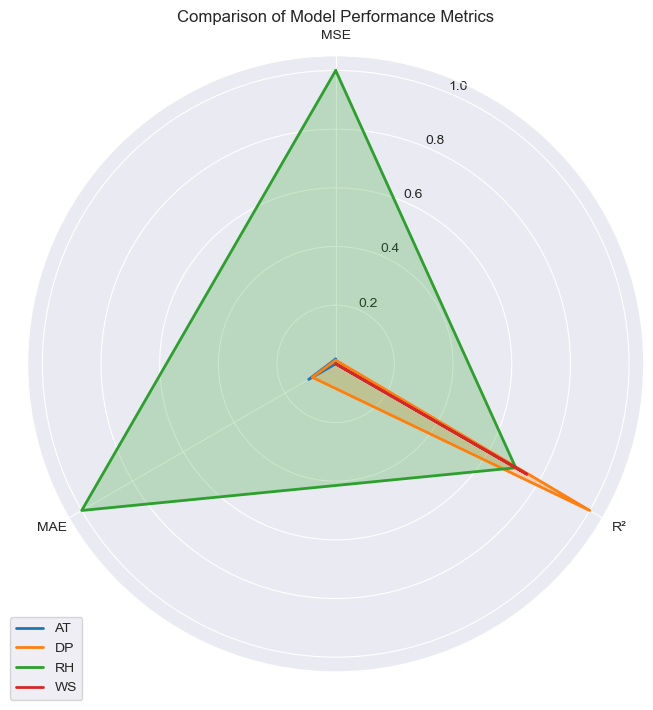

In [126]:
from math import pi
import matplotlib.pyplot as plt

# 数据准备：确保每个列表包含与目标变量数量相对应的项
categories = ['MSE', 'R²', 'MAE']
num_vars = len(categories)

# 这里我们假设数据已经标准化为 [0, 1] 区间内，以便在雷达图上绘制
mse_scores_normalized = (mse_scores - np.min(mse_scores)) / (np.max(mse_scores) - np.min(mse_scores))
r2_scores_normalized = (r2_scores - np.min(r2_scores)) / (np.max(r2_scores) - np.min(r2_scores))
mae_scores_normalized = (mae_scores - np.min(mae_scores)) / (np.max(mae_scores) - np.min(mae_scores))

data = [
    [mse_scores_normalized[0], r2_scores_normalized[0], mae_scores_normalized[0]],
    [mse_scores_normalized[1], r2_scores_normalized[1], mae_scores_normalized[1]],
    [mse_scores_normalized[2], r2_scores_normalized[2], mae_scores_normalized[2]],
    [mse_scores_normalized[3], r2_scores_normalized[3], mae_scores_normalized[3]],
]

# 角度和布局
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # 将第一个角度加到最后，用于闭合图形

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# 绘制每一个雷达图
for i in range(len(Y_labels)):
    values = data[i] + data[i][:1]  # 闭合图形
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=Y_labels[i])
    ax.fill(angles, values, alpha=0.25)

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids([angle * 180/pi for angle in angles[:-1]], categories)

plt.title('Comparison of Model Performance Metrics')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.savefig('../Images_Output/Radar_Chart_Model_Performance_Comparison.png')

plt.show()


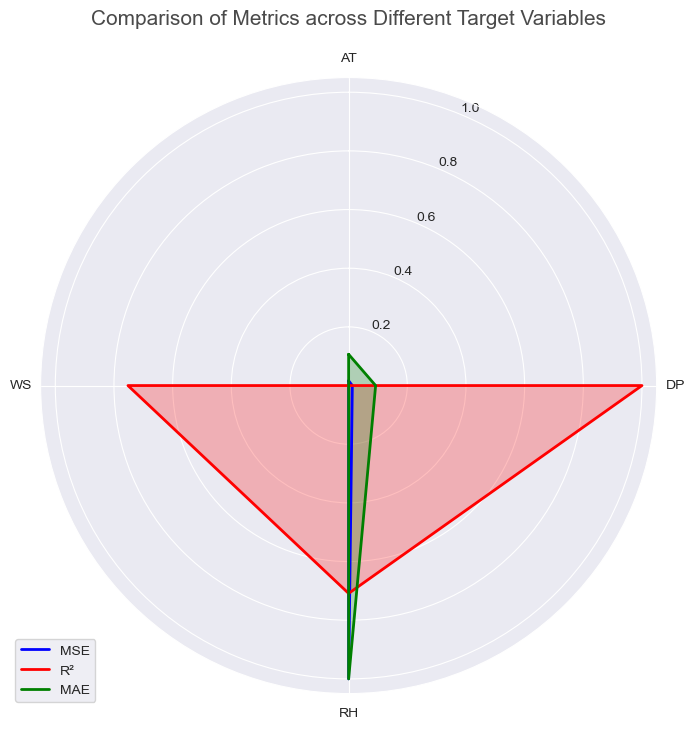

In [128]:
from math import pi
import matplotlib.pyplot as plt
import numpy as np

# 数据准备
categories = Y_labels
num_vars = len(categories)

# 数据标准化
mse_scores_normalized = (mse_scores - np.min(mse_scores)) / (np.max(mse_scores) - np.min(mse_scores))
r2_scores_normalized = (r2_scores - np.min(r2_scores)) / (np.max(r2_scores) - np.min(r2_scores))
mae_scores_normalized = (mae_scores - np.min(mae_scores)) / (np.max(mae_scores) - np.min(mae_scores))

data = [
    mse_scores_normalized.tolist(),
    r2_scores_normalized.tolist(),
    mae_scores_normalized.tolist()
]

# 使每个数据循环闭合
for i in range(len(data)):
    data[i] += data[i][:1]

angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

# 开始绘制雷达图
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# 添加每一条数据到雷达图上
labels = ['MSE', 'R²', 'MAE']
colors = ['b', 'r', 'g']

for i in range(len(data)):
    ax.plot(angles, data[i], linewidth=2, linestyle='solid', label=labels[i], color=colors[i])
    ax.fill(angles, data[i], color=colors[i], alpha=0.25)

# 添加特征名称到角度
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids([angle * 180/pi for angle in angles[:-1]], categories)

# 添加标题和图例
plt.title('Comparison of Metrics across Different Target Variables', size=15, color='#4A4A4A', pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=10)

plt.savefig('../Images_Output/Radar_Chart_Comparison_of_Metrics_across_Different_Target_Variables.png')

plt.show()


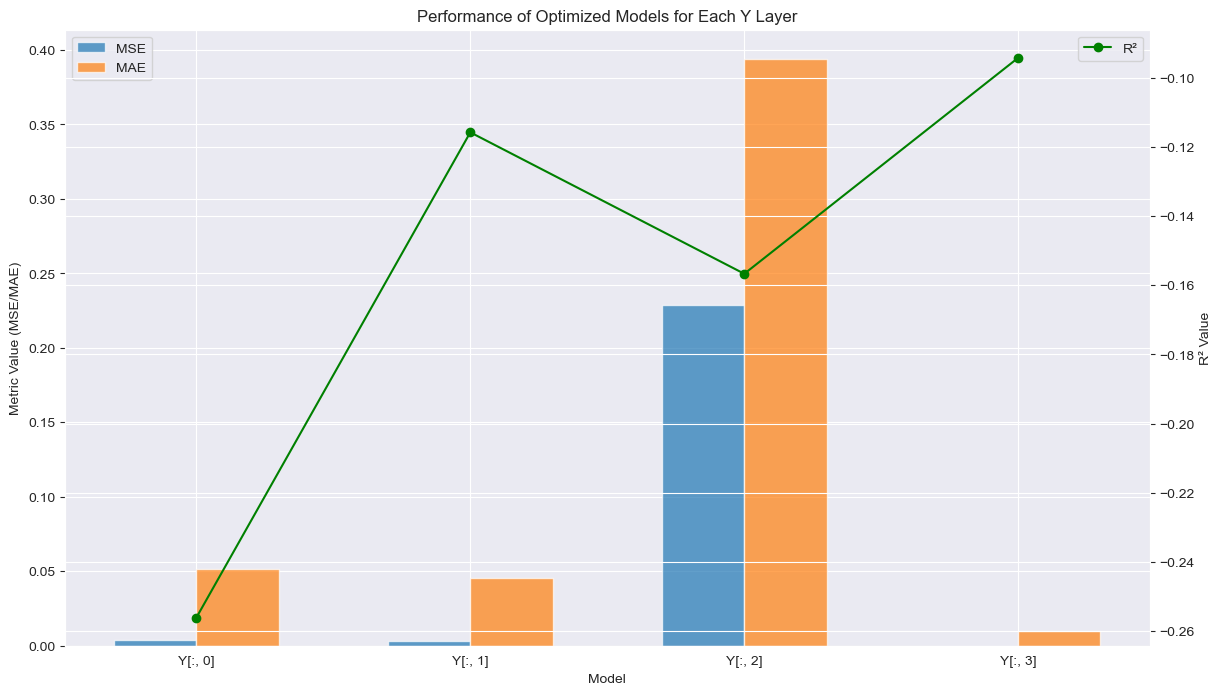

In [53]:
# 绘制每层Y的评价指标柱状图
all_mse_scores = [metrics['mse'] for metrics in best_metrics_list]
all_r2_scores = [metrics['r2'] for metrics in best_metrics_list]
all_mae_scores = [metrics['mae'] for metrics in best_metrics_list]

fig, ax1 = plt.subplots(figsize=(14, 8))

iterations = np.arange(1, Y.shape[1] + 1)  # 根据Y的列数生成模型编号

# 绘制MSE和MAE的柱状图（左侧y轴）
bar_width = 0.3

ax1.bar(iterations - bar_width/2, all_mse_scores, bar_width, label='MSE', alpha=0.7)
ax1.bar(iterations + bar_width/2, all_mae_scores, bar_width, label='MAE', alpha=0.7)

ax1.set_xlabel('Model')
ax1.set_ylabel('Metric Value (MSE/MAE)')
ax1.set_title('Performance of Optimized Models for Each Y Layer')
ax1.legend(loc='upper left')
ax1.grid(True)

# 创建右侧的y轴，用于绘制R²的折线图
ax2 = ax1.twinx()

ax2.plot(iterations, all_r2_scores, label='R²', marker='o', color='green')

ax2.set_ylabel('R² Value')
ax2.legend(loc='upper right')

plt.xticks(iterations, [f'Y[:, {i}]' for i in range(Y.shape[1])])  # 设置x轴刻度标签为Y[:, 0], Y[:, 1], ...

plt.savefig('../Images_Output/Bar_Chart_Performance_of_Optimized_Models_for_Each_Y_Layer.png')

plt.show()


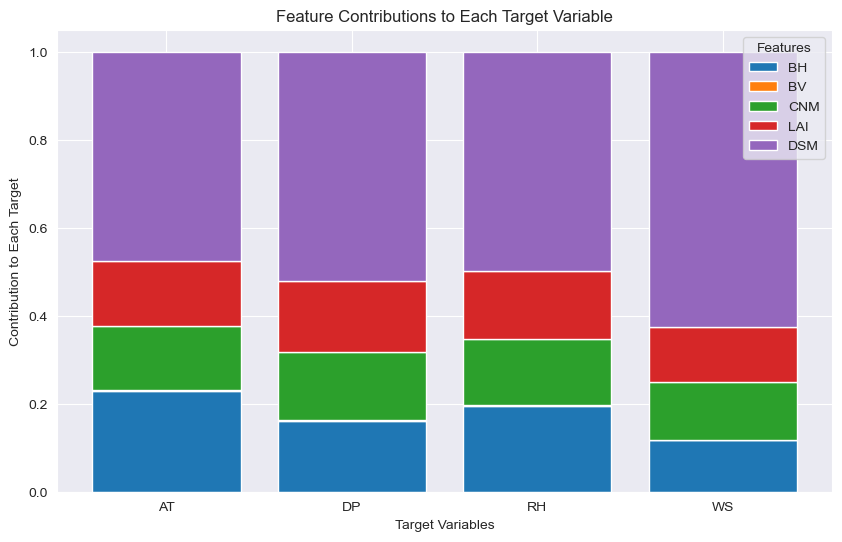

In [54]:
# 特征名称
# feature_names = ['BH', 'BV', 'CHM', 'LAI', 'DEM']
feature_names = X_labels

# 目标变量名称
# target_names = ['Dew Point (°C)', 'Air Temperature (°C)', 'Relative Humidity (%)', 'Wind Speed (kn)']
target_names = Y_labels

# 绘制堆积柱状图
fig, ax = plt.subplots(figsize=(10, 6))

# 每一列表示一个目标变量的贡献
for i, row in enumerate(importance_matrices):
    ax.bar(target_names, row, bottom=np.sum(importance_matrices[:i], axis=0), label=feature_names[i])

ax.set_xlabel('Target Variables')
ax.set_ylabel('Contribution to Each Target')
ax.set_title('Feature Contributions to Each Target Variable')
ax.legend(title="Features")

plt.savefig('../Images_Output/Stacked_Bar_Chart_Feature_Contributions_to_Each_Target_Variable.png')

plt.show()

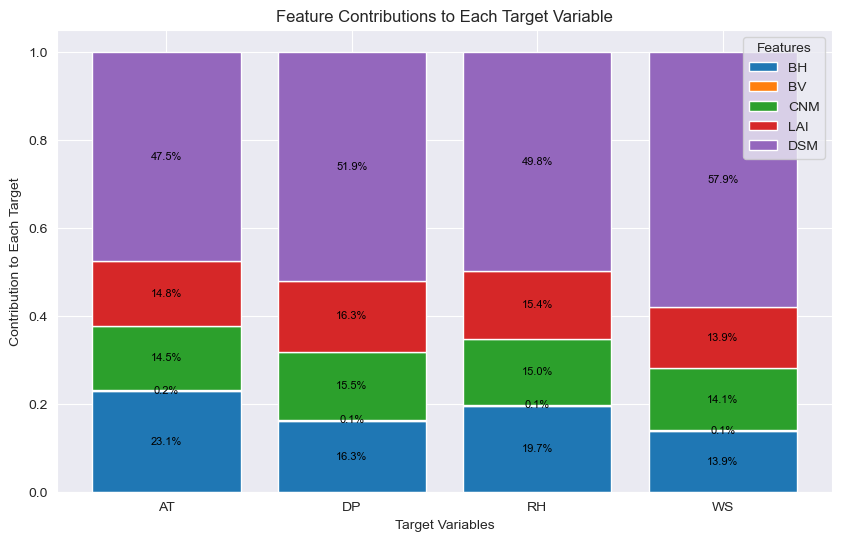

In [139]:

# 目标变量名称
target_names = Y_labels

# 绘制堆积柱状图
fig, ax = plt.subplots(figsize=(10, 6))

# 每一列表示一个目标变量的贡献
for i, row in enumerate(importance_matrices):
    bars = ax.bar(target_names, row, bottom=np.sum(importance_matrices[:i], axis=0), label=feature_names[i])

    # 在每个柱状图部分上显示百分比
    for bar, contribution in zip(bars, row):
        height = bar.get_height()
        ax.annotate(f'{contribution:.1%}',  # 转换为百分比格式
                    xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                    ha='center', va='center', fontsize=8, color='black')

ax.set_xlabel('Target Variables')
ax.set_ylabel('Contribution to Each Target')
ax.set_title('Feature Contributions to Each Target Variable')
ax.legend(title="Features")

plt.savefig('../Images_Output/Stacked_Bar_Chart_Feature_Contributions_to_Each_Target_Variable_Percentage.png')

plt.show()


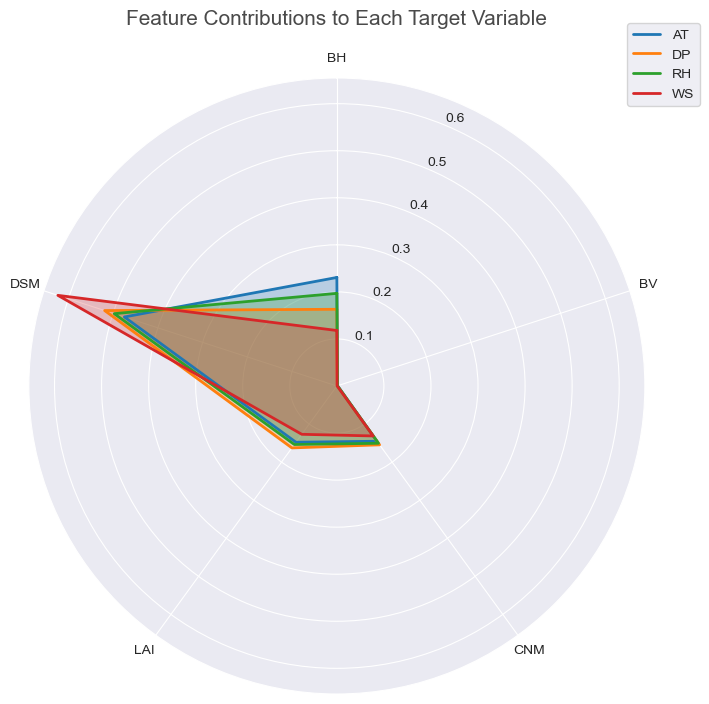

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

# 特征名称
# feature_names = ['BH', 'BV', 'CHM', 'LAI', 'DEM']
feature_names = X_labels

# 目标变量名称
# target_names = ['Dew Point (°C)', 'Air Temperature (°C)', 'Relative Humidity (%)', 'Wind Speed (kn)']
target_names = Y_labels

# 雷达图的角度计算
num_vars = len(feature_names)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # 闭合雷达图

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# 绘制每个目标变量的雷达图
for i in range(len(target_names)):
    values = importance_matrices[:, i].tolist()
    values += values[:1]  # 闭合图形

    ax.plot(angles, values, linewidth=2, linestyle='solid', label=target_names[i])
    ax.fill(angles, values, alpha=0.25)

# 添加特征名称到角度
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids([angle * 180/pi for angle in angles[:-1]], feature_names)

# 添加标题和图例
plt.title('Feature Contributions to Each Target Variable', size=15, color='#4A4A4A', pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize=10)

plt.savefig('../Images_Output/Radar_Chart_Feature_Contributions_to_Each_Target_Variable.png')

plt.show()


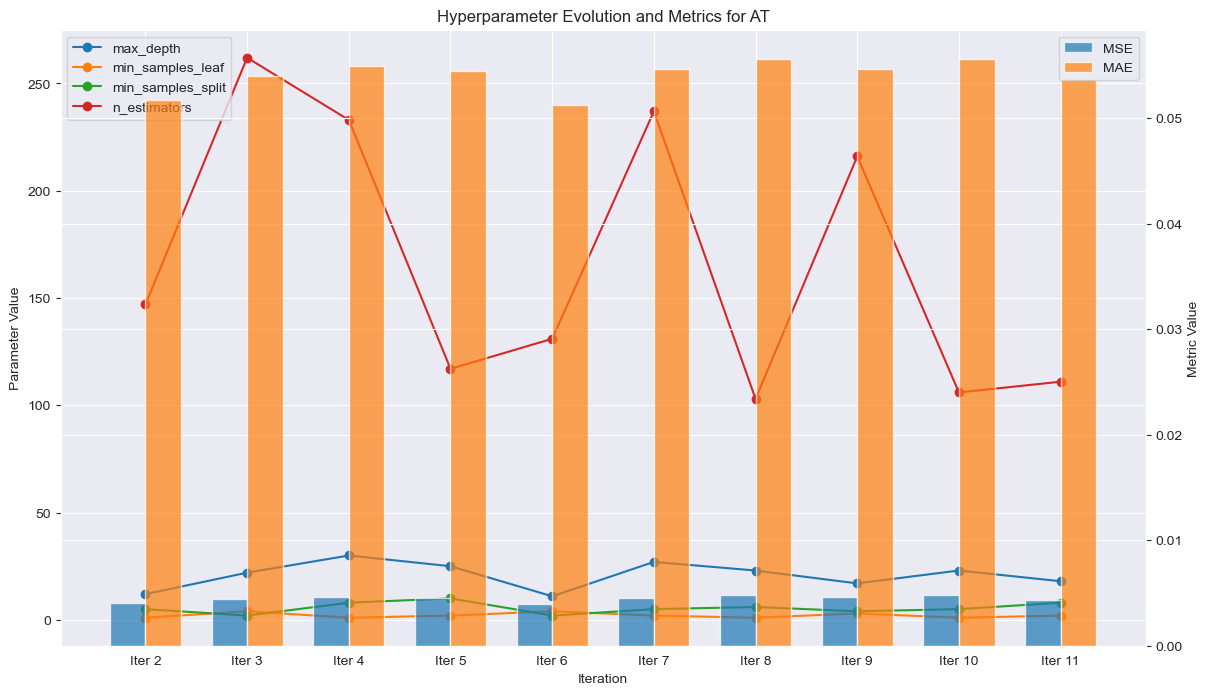

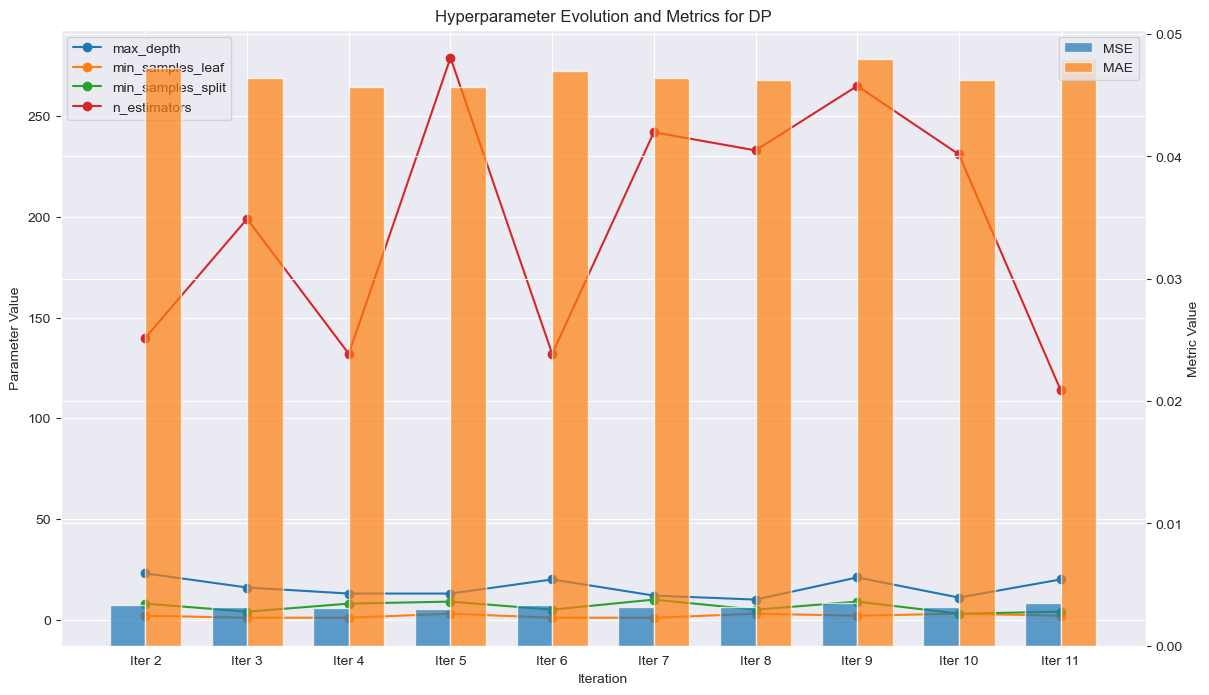

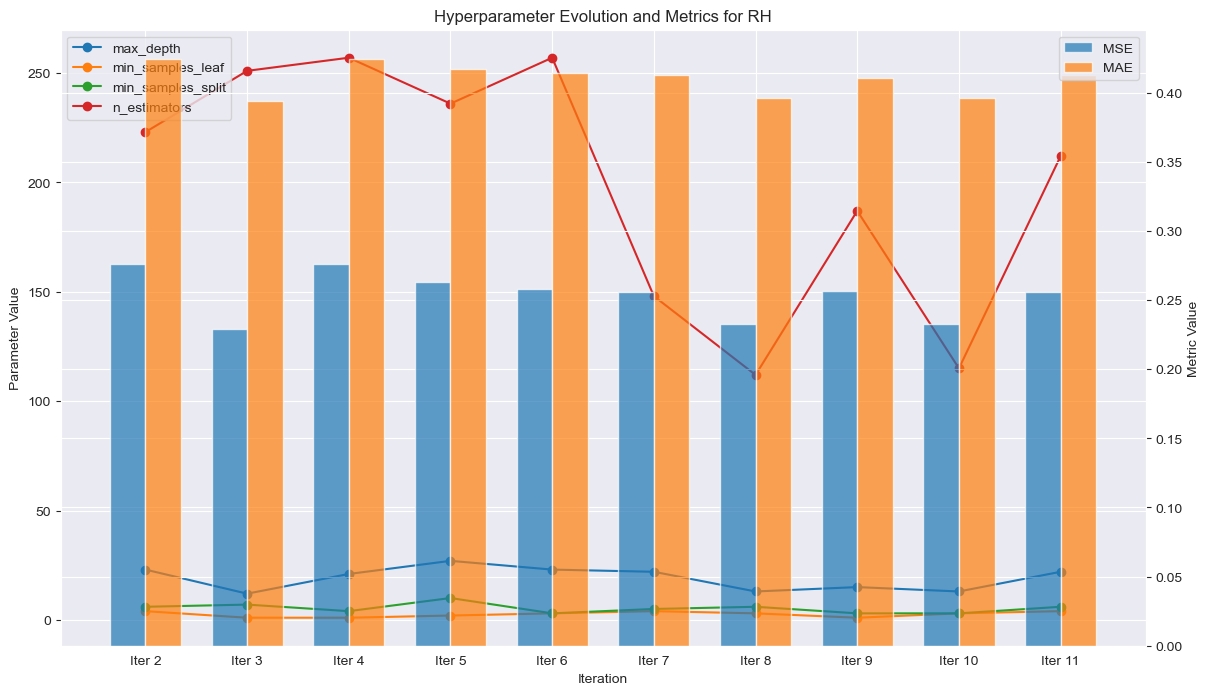

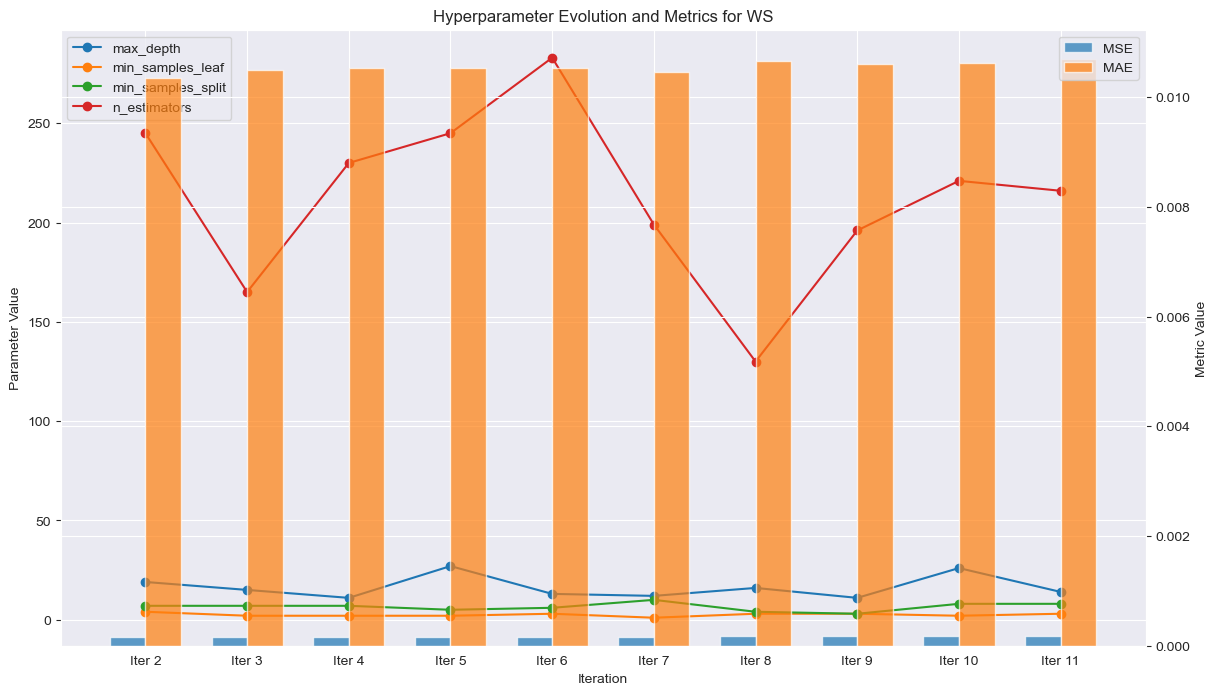

In [132]:
import matplotlib.pyplot as plt
import numpy as np

def plot_iteration_results(iter_params, iter_metrics, y_index, Y_labels=Y_labels):
    iterations = np.arange(1, len(iter_params) + 1)

    # 提取参数值
    max_depth_values = [params['max_depth'] for params in iter_params]
    min_samples_leaf_values = [params['min_samples_leaf'] for params in iter_params]
    min_samples_split_values = [params['min_samples_split'] for params in iter_params]
    n_estimators_values = [params['n_estimators'] for params in iter_params]

    # 创建图表
    fig, ax1 = plt.subplots(figsize=(14, 8))

    # 绘制数值参数的折线图（左侧y轴）
    ax1.plot(iterations, max_depth_values, label='max_depth', marker='o')
    ax1.plot(iterations, min_samples_leaf_values, label='min_samples_leaf', marker='o')
    ax1.plot(iterations, min_samples_split_values, label='min_samples_split', marker='o')
    ax1.plot(iterations, n_estimators_values, label='n_estimators', marker='o')

    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Parameter Value')
    ax1.set_title(f'Hyperparameter Evolution and Metrics for {Y_labels[y_index]}')
    ax1.legend(loc='upper left')
    ax1.grid(True)

    # 创建右侧的y轴，用于绘制柱状图
    ax2 = ax1.twinx()

    # 绘制MSE和MAE的柱状图（右侧y轴）
    mse_values = [metrics['mse'] for metrics in iter_metrics]
    mae_values = [metrics['mae'] for metrics in iter_metrics]

    bar_width = 0.35
    # index = np.arange(len(iterations))
    index = iterations  # 保持与折线图相同的x轴

    ax2.bar(index - bar_width/2, mse_values, bar_width, label='MSE', alpha=0.7)
    ax2.bar(index + bar_width/2, mae_values, bar_width, label='MAE', alpha=0.7)

    ax2.set_ylabel('Metric Value')
    ax2.legend(loc='upper right')

    # 使用 index 而不是 iterations 来设置 xticks
    ax1.set_xticks(index)
    ax1.set_xticklabels([f'Iter {i+1}' for i in index])

    plt.show()

# 为每层Y绘制图表
for i in range(len(all_iter_params)):
    plot_iteration_results(all_iter_params[i], all_iter_metrics[i], i)


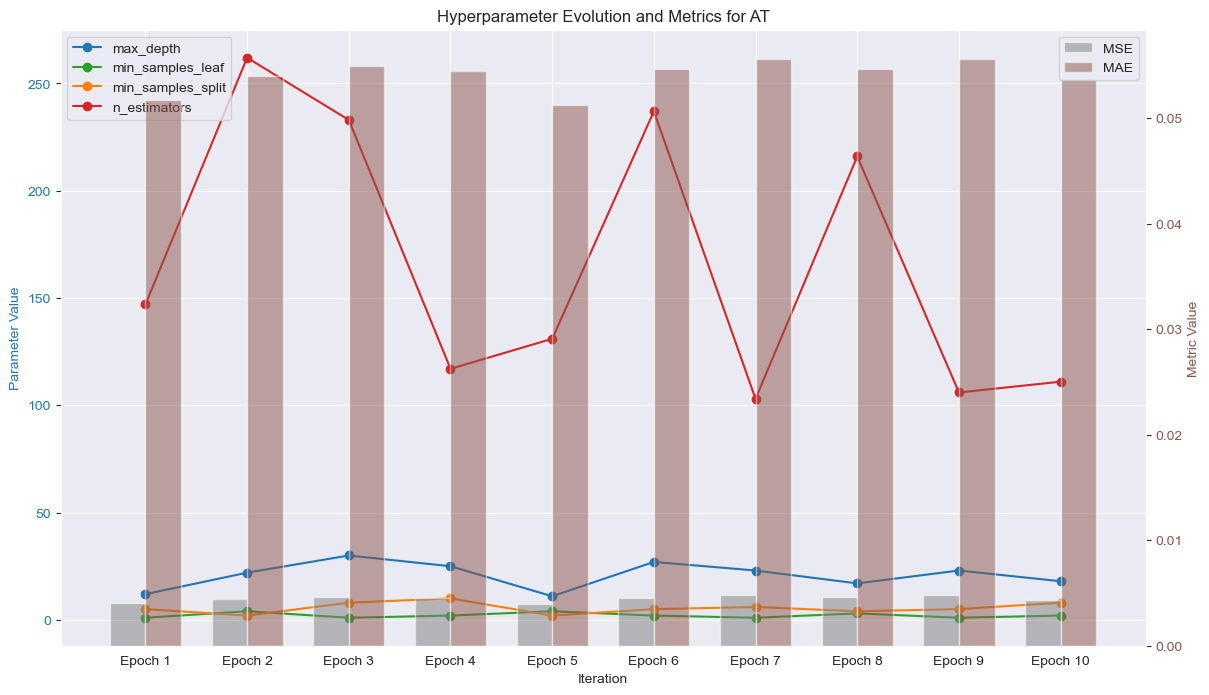

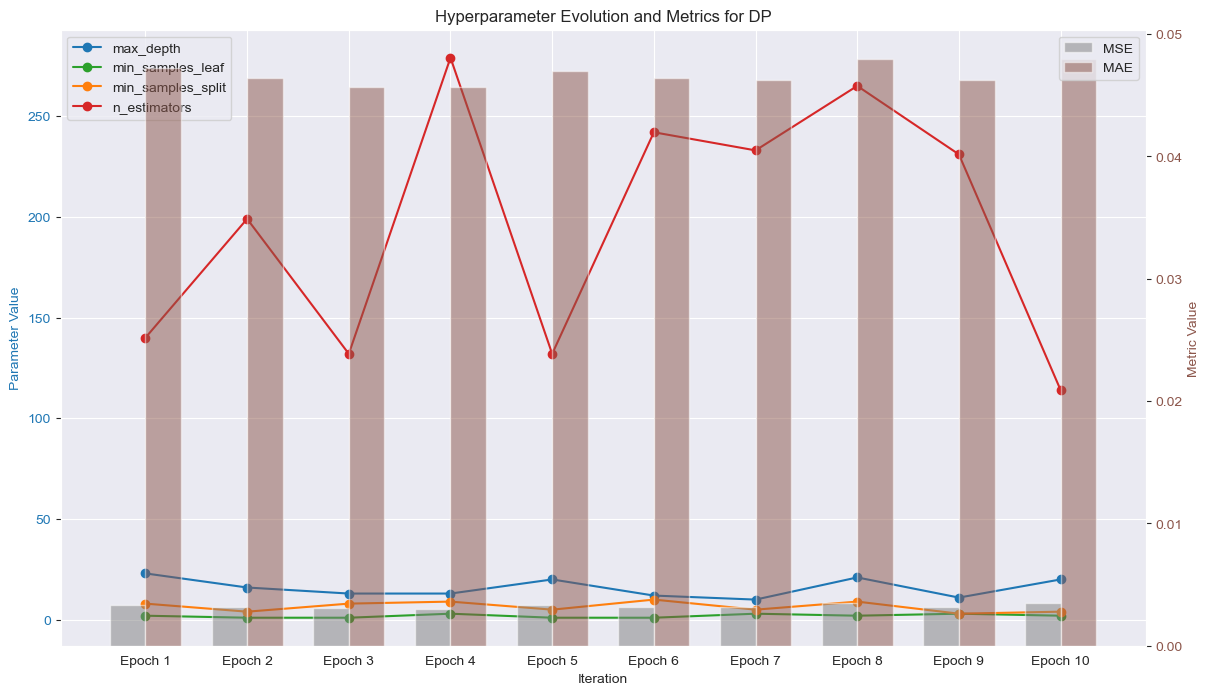

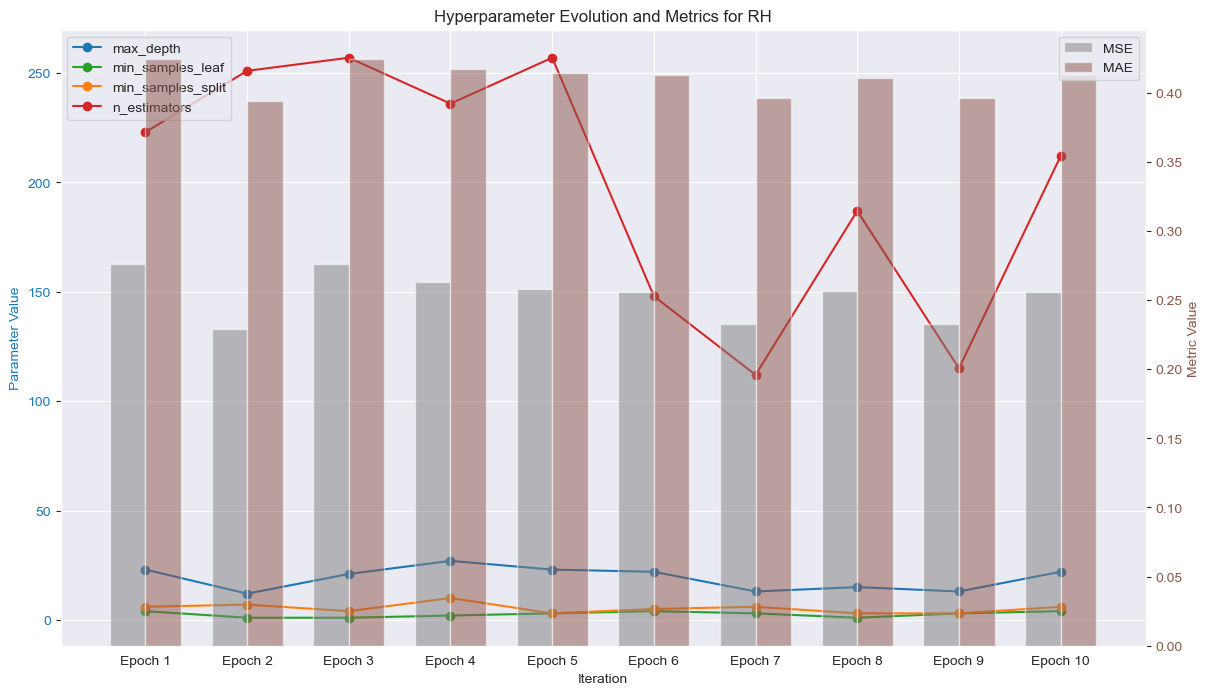

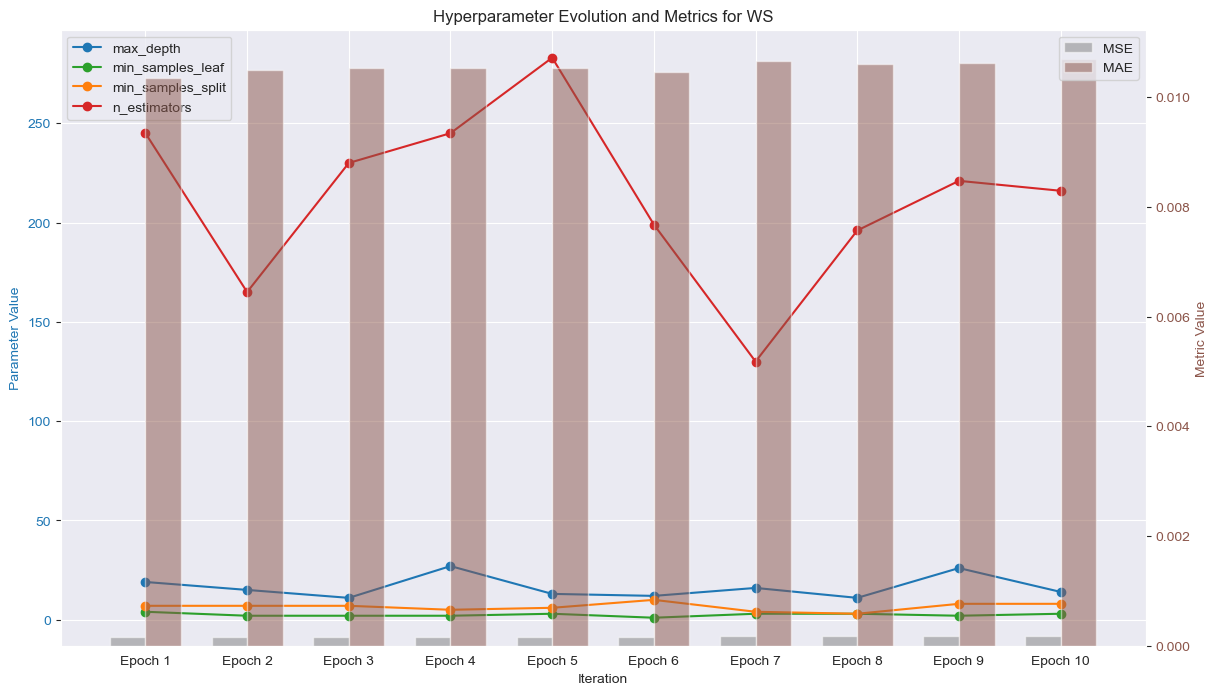

In [137]:
import matplotlib.pyplot as plt
import numpy as np

def plot_iteration_results(iter_params, iter_metrics, y_index):
    iterations = np.arange(1, len(iter_params) + 1)

    # 提取参数值
    max_depth_values = [params['max_depth'] for params in iter_params]
    min_samples_leaf_values = [params['min_samples_leaf'] for params in iter_params]
    min_samples_split_values = [params['min_samples_split'] for params in iter_params]
    n_estimators_values = [params['n_estimators'] for params in iter_params]

    # 创建图表
    fig, ax1 = plt.subplots(figsize=(14, 8))

    # 绘制数值参数的折线图（左侧y轴）
    ax1.plot(iterations, max_depth_values, label='max_depth', marker='o', color='tab:blue')
    ax1.plot(iterations, min_samples_leaf_values, label='min_samples_leaf', marker='o', color='tab:green')
    ax1.plot(iterations, min_samples_split_values, label='min_samples_split', marker='o', color='tab:orange')
    ax1.plot(iterations, n_estimators_values, label='n_estimators', marker='o', color='tab:red')

    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Parameter Value', color='tab:blue')  # 左侧y轴颜色
    ax1.set_title(f'Hyperparameter Evolution and Metrics for {Y_labels[y_index]}')
    ax1.legend(loc='upper left')
    ax1.grid(True)

    # 设置左侧y轴标签颜色
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # 创建右侧的y轴，用于绘制柱状图
    ax2 = ax1.twinx()

    # 绘制MSE和MAE的柱状图（右侧y轴）
    mse_values = [metrics['mse'] for metrics in iter_metrics]
    mae_values = [metrics['mae'] for metrics in iter_metrics]

    bar_width = 0.35
    index = iterations

    ax2.bar(index - bar_width/2, mse_values, bar_width, label='MSE', alpha=0.5, color='tab:gray', align='center')
    ax2.bar(index + bar_width/2, mae_values, bar_width, label='MAE', alpha=0.5, color='tab:brown', align='center')

    ax2.set_ylabel('Metric Value', color='tab:brown')  # 右侧y轴颜色
    ax2.legend(loc='upper right')

    # 设置右侧y轴标签颜色
    ax2.tick_params(axis='y', labelcolor='tab:brown')

    # 设置xticks，使其与柱状图和折线图对齐
    ax1.set_xticks(index)
    ax1.set_xticklabels([f'Epoch {i}' for i in index])
    
    # 只在左侧y轴上显示网格线
    ax1.grid(True)
    ax2.grid(False)  # 禁用右侧y轴的网格线
    
    
    plt.savefig(f'../Images_Output/Iteration_Results_Y_{Y_labels[y_index]}.png')
    
    plt.show()

# 为每层Y绘制图表
for i in range(len(all_iter_params)):
    plot_iteration_results(all_iter_params[i], all_iter_metrics[i], i)


In [57]:
# 将特征重要性结果转化为DataFrame
importance_df = pd.DataFrame(importance_matrices,
                             columns=['Dew Point (°C)', 'Air Temperature (°C)', 'Relative Humidity (%)', 'Wind Speed (kn)'],
                             index=['BH', 'BV', 'CHM', 'LAI', 'DEM'])

print("Feature Importances:")
importance_df


Feature Importances:


,Dew Point (°C),Air Temperature (°C),Relative Humidity (%),Wind Speed (kn)
BH,0.230661,0.163035,0.196903,0.117929
BV,0.001622,0.000971,0.001423,0.000579
CHM,0.145122,0.154536,0.150450,0.131213
LAI,0.147788,0.162635,0.153723,0.126876
DEM,0.474807,0.518822,0.497501,0.623404


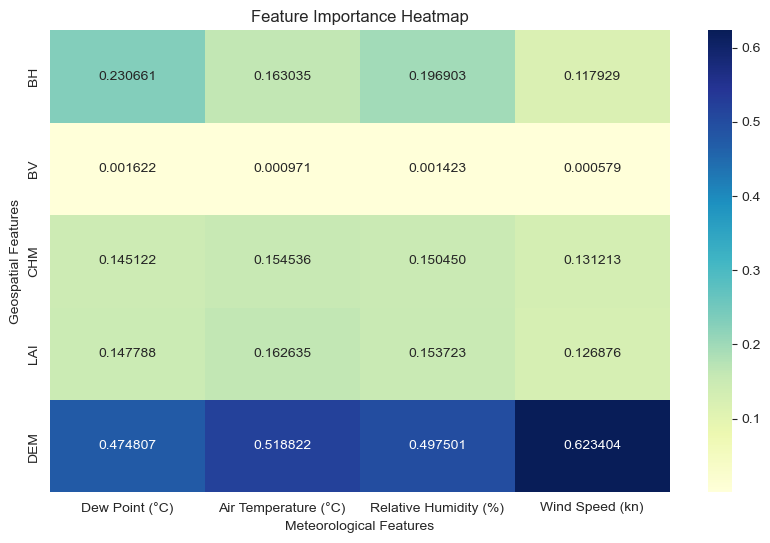

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 设置热图的绘制风格
plt.figure(figsize=(10, 6))
sns.heatmap(importance_df, annot=True, cmap='YlGnBu', fmt='.6f')

# 设置标题和轴标签
plt.title('Feature Importance Heatmap')
plt.xlabel('Meteorological Features')
plt.ylabel('Geospatial Features')

plt.savefig('../Images_Output/Heatmap_Feature_Importance_YlGnBu.png')

# 显示热图
plt.show()


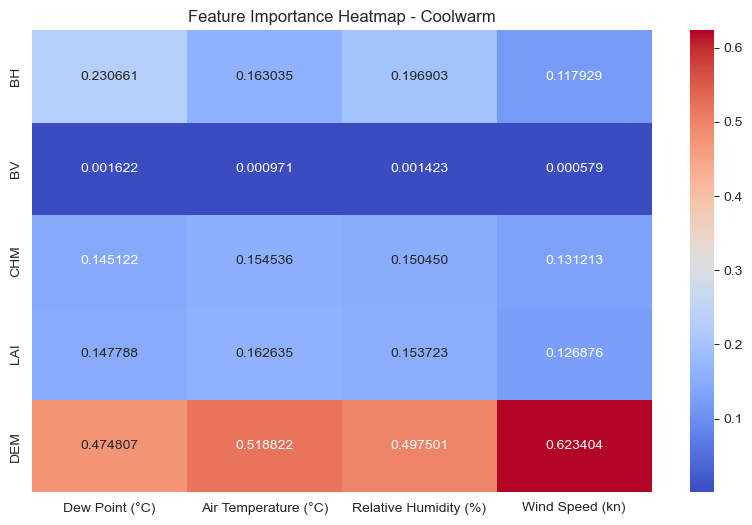

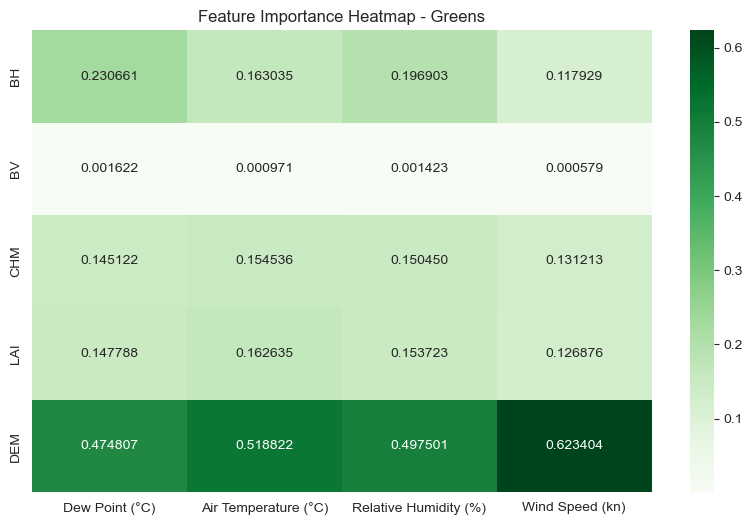

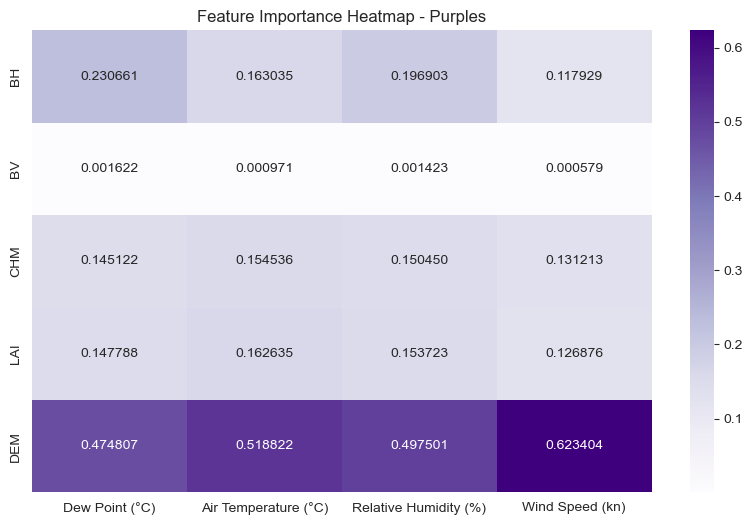

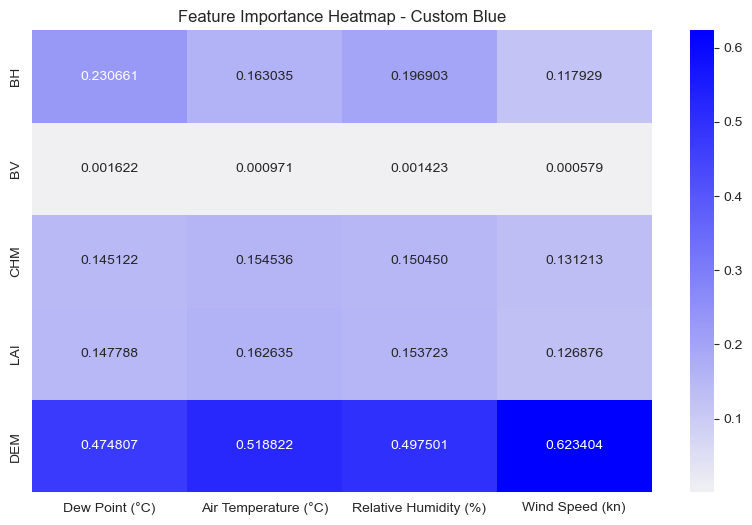

In [59]:

# 示例1：使用红蓝配色方案
plt.figure(figsize=(10, 6))
sns.heatmap(importance_df, annot=True, cmap='coolwarm', fmt='.6f')
plt.title('Feature Importance Heatmap - Coolwarm')
plt.savefig('../Images_Output/Heatmap_Feature_Importance_Coolwarm.png')
plt.show()

# 示例2：使用绿色配色方案
plt.figure(figsize=(10, 6))
sns.heatmap(importance_df, annot=True, cmap='Greens', fmt='.6f')
plt.title('Feature Importance Heatmap - Greens')
plt.savefig('../Images_Output/Heatmap_Feature_Importance_Greens.png')
plt.show()

# 示例3：使用紫色配色方案
plt.figure(figsize=(10, 6))
sns.heatmap(importance_df, annot=True, cmap='Purples', fmt='.6f')
plt.title('Feature Importance Heatmap - Purples')
plt.savefig('../Images_Output/Heatmap_Feature_Importance_Purples.png')
plt.show()

# 示例4：使用自定义配色方案
plt.figure(figsize=(10, 6))
custom_cmap = sns.color_palette("light:b", as_cmap=True)
sns.heatmap(importance_df, annot=True, cmap=custom_cmap, fmt='.6f')
plt.title('Feature Importance Heatmap - Custom Blue')
plt.savefig('../Images_Output/Heatmap_Feature_Importance_Custom_Blue.png')
plt.show()

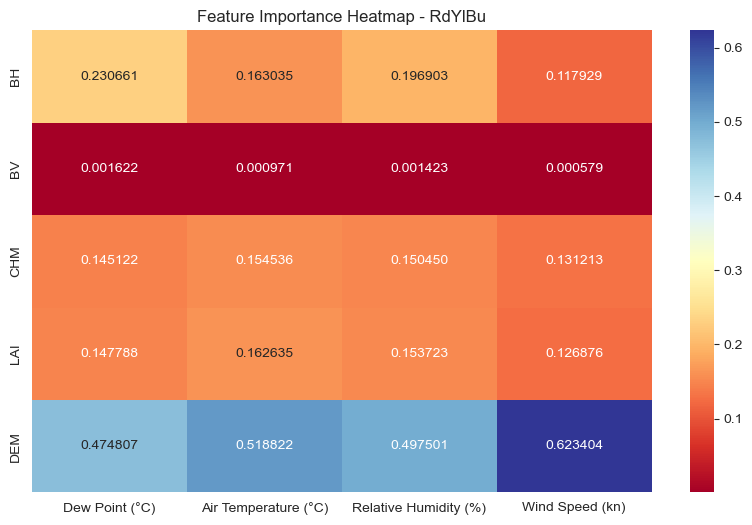

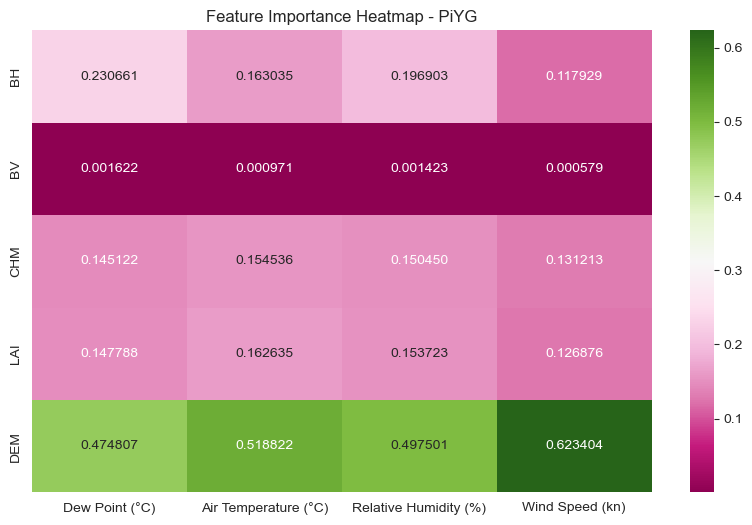

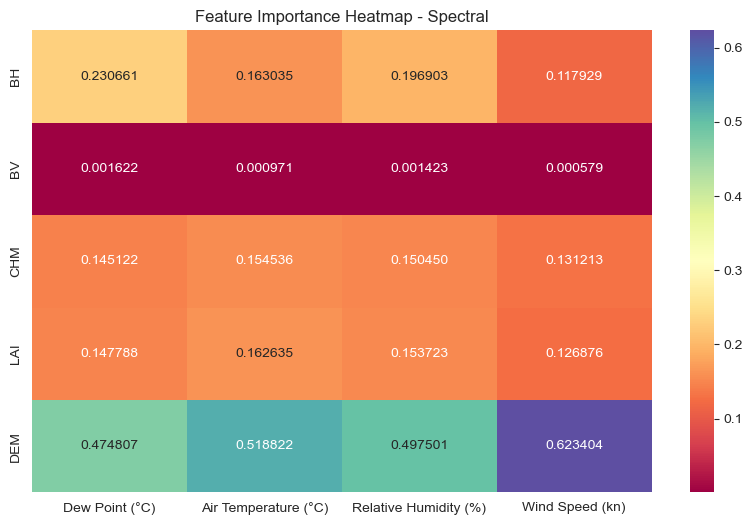

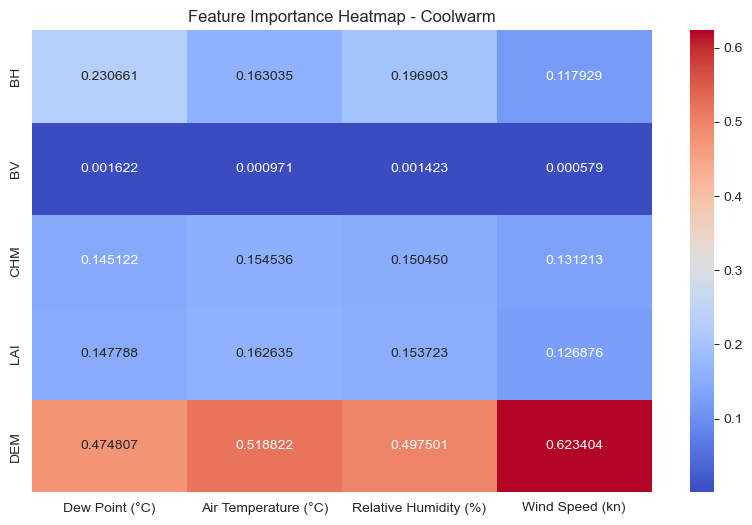

In [60]:
# 设置热图的绘制风格和配色方案
plt.figure(figsize=(10, 6))

# 示例1：使用红黄蓝对比色方案
sns.heatmap(importance_df, annot=True, cmap='RdYlBu', fmt='.6f')
plt.title('Feature Importance Heatmap - RdYlBu')
plt.savefig('../Images_Output/Heatmap_Feature_Importance_RdYlBu.png')
plt.show()

# 示例2：使用粉红与绿色的对比色方案
plt.figure(figsize=(10, 6))
sns.heatmap(importance_df, annot=True, cmap='PiYG', fmt='.6f')
plt.title('Feature Importance Heatmap - PiYG')
plt.savefig('../Images_Output/Heatmap_Feature_Importance_PiYG.png')
plt.show()

# 示例3：使用多彩的对比色方案
plt.figure(figsize=(10, 6))
sns.heatmap(importance_df, annot=True, cmap='Spectral', fmt='.6f')
plt.title('Feature Importance Heatmap - Spectral')
plt.savefig('../Images_Output/Heatmap_Feature_Importance_Spectral.png')
plt.show()

# 示例4：使用冷暖对比色方案
plt.figure(figsize=(10, 6))
sns.heatmap(importance_df, annot=True, cmap='coolwarm', fmt='.6f')
plt.title('Feature Importance Heatmap - Coolwarm')
plt.savefig('../Images_Output/Heatmap_Feature_Importance_Coolwarm.png')
plt.show()

In [61]:
# import matplotlib.pyplot as plt
# 
# # 定义要绘制的超参数名称
# param_names = list(search_space.keys())
# colors = ['r', 'g', 'b', 'm']  # 4个模型的颜色
# 
# # 遍历每个超参数
# for param_name in param_names:
#     plt.figure(figsize=(10, 6))
# 
#     # 对于每个模型，获取其参数历史，并绘制在同一张图上
#     for i in range(4):
#         # 获取当前模型对应的参数历史
#         params_history = []
#         for best_index in range(len(all_results[i][0]['mse_scores'])):
#             params_history.append(bayes_search.cv_results_['params'][best_index])
# 
#         param_values = [params[param_name] for params in params_history]
# 
#         if isinstance(search_space[param_name], Categorical):
#             # 如果超参数是类别类型，绘制类别标签
#             unique_categories = list(set(param_values))
#             category_to_num = {category: num for num, category in enumerate(unique_categories)}
#             num_values = [category_to_num[val] for val in param_values]
#             plt.plot(range(len(num_values)), num_values, marker='o', color=colors[i], label=f'Model {i+1}')
#             plt.yticks(list(category_to_num.values()), list(category_to_num.keys()))
#         else:
#             # 如果是数值类型，直接绘制
#             plt.plot(range(len(param_values)), param_values, marker='o', color=colors[i], label=f'Model {i+1}')
# 
#     plt.title(f'{param_name} evolution during Bayes Optimization')
#     plt.xlabel('Iteration')
#     plt.ylabel(param_name)
#     plt.legend()  # 显示图例
#     plt.grid(True)
#     plt.show()


In [62]:
# import matplotlib.pyplot as plt
# 
# # 定义评估指标和对应的键
# metrics = ['MSE', 'R²', 'MAE']
# metric_keys = ['mse_scores', 'r2_scores', 'mae_scores']
# 
# # 创建一个包含多个子图的图表
# fig, axs = plt.subplots(len(metrics), 1, figsize=(14, 8 * len(metrics)))
# 
# # 遍历每个评估指标并绘制子图
# for idx, (metric_name, metric_key) in enumerate(zip(metrics, metric_keys)):
#     for i, (result, _) in enumerate(all_results):
#         axs[idx].plot(range(len(result[metric_key])), result[metric_key], label=f'Model {i+1}', marker='o')
# 
#     axs[idx].set_title(f'{metric_name} evolution during Bayes Optimization')
#     axs[idx].set_xlabel('Iteration')
#     axs[idx].set_ylabel(metric_name)
#     axs[idx].legend()
#     axs[idx].grid(True)
# 
# # 自动调整子图布局，避免重叠
# plt.tight_layout()
# 
# # 显示图表
# plt.show()


In [63]:
# # 初始化用于存储参数和评估指标的列表
# params_list = []
# metrics_list = []
# 
# # 遍历每个模型的结果
# for i, (result, best_params) in enumerate(all_results):
#     # 将最佳参数保存到 params_list 中
#     best_params['Model'] = f'Model {i+1}'
#     params_list.append(best_params)
# 
#     # 将最终的评估指标保存到 metrics_list 中
#     metrics = {
#         'Model': f'Model {i+1}',
#         'MSE': result['mse_scores'][-1],
#         'R²': result['r2_scores'][-1],
#         'MAE': result['mae_scores'][-1],
#     }
#     metrics_list.append(metrics)
# 
# # 将参数和评估指标分别转换为 DataFrame
# params_df = pd.DataFrame(params_list)
# metrics_df = pd.DataFrame(metrics_list)

In [64]:
# params_df

In [65]:
# metrics_df

In [66]:
# %%time
# # 开始针对 Y 的四次训练
# for i in range(4):
#     print(f"Optimizing model {i+1}/4")
# 
#     # 在新一轮循环开始前，确保关闭和清理之前的进度条
#     if 'progress_callback' in locals():
#         progress_callback.close()
#         del progress_callback
# 
#     # 实例化进度条回调函数
#     # progress_callback = TqdmProgressCallback(total_iterations=n_iter, model_idx=i)
#     progress_callback = TqdmTimeProgressCallback(total_iterations=n_iter, model_idx=i)
# 
#     # 开始贝叶斯优化
#     print('----------start fit----------')
#     bayes_search.fit(X, Y[:, i], callback=[progress_callback])
#     print('----------end fit----------')
# 
#     # 显式关闭进度条
#     progress_callback.close()
# 
#     # 直接从 cv_results_ 中提取每次迭代的评估指标
#     mae_scores = -bayes_search.cv_results_['mean_test_mae']  # 负号是因为贝叶斯优化会尝试最小化评分，但我们想要最大化评分，在优化中实际使用的是neg_mean_squared_error
#     r2_scores = -bayes_search.cv_results_['mean_test_r2']
#     mse_scores = bayes_search.cv_results_['mean_test_mse']
# 
#     # 将结果存储
#     result = {
#         'mse_scores': mse_scores,
#         'r2_scores': r2_scores,
#         'mae_scores': mae_scores,
#     }
#     all_results.append((result, bayes_search.best_params_))
# 
#     # 获取特征重要性
#     importance_matrix[:, i] = bayes_search.best_estimator_.feature_importances_
# 
# # 打印或保存结果
